In [4]:
#import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import os
import warnings
import json

warnings.filterwarnings('ignore')
# Set the style for seaborn
sns.set(style="whitegrid")

In [5]:
#load all related dataset
df_prod= pd.read_csv('C:/Users/DONKAMS/Downloads/Stage-D-Exercise/Dataset (Prep)/Africa Food Production (2004 - 2013).csv')
df_supp= pd.read_csv('C:/Users/DONKAMS/Downloads/Stage-D-Exercise/Dataset (Prep)/Africa Food Supply (2004 - 2013).csv')

In [6]:
df_prod.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [7]:
df_prod.shape

(23110, 4)

In [8]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [9]:
df_prod.describe()

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


In [10]:
df_supp.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [11]:
df_supp.shape

(450, 3)

In [12]:
df_supp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [13]:
df_supp.describe()

,Year,Value
count,450.000000,450.000000
mean,2008.500000,2469.775556
std,2.875478,379.140143
min,2004.000000,1781.000000
25%,2006.000000,2174.000000
50%,2008.500000,2376.000000
75%,2011.000000,2681.750000
max,2013.000000,3561.000000


In [14]:
df_prod.columns , df_supp.columns

(Index(['Country', 'Item', 'Year', 'Value'], dtype='object'),
 Index(['Country', 'Year', 'Value'], dtype='object'))

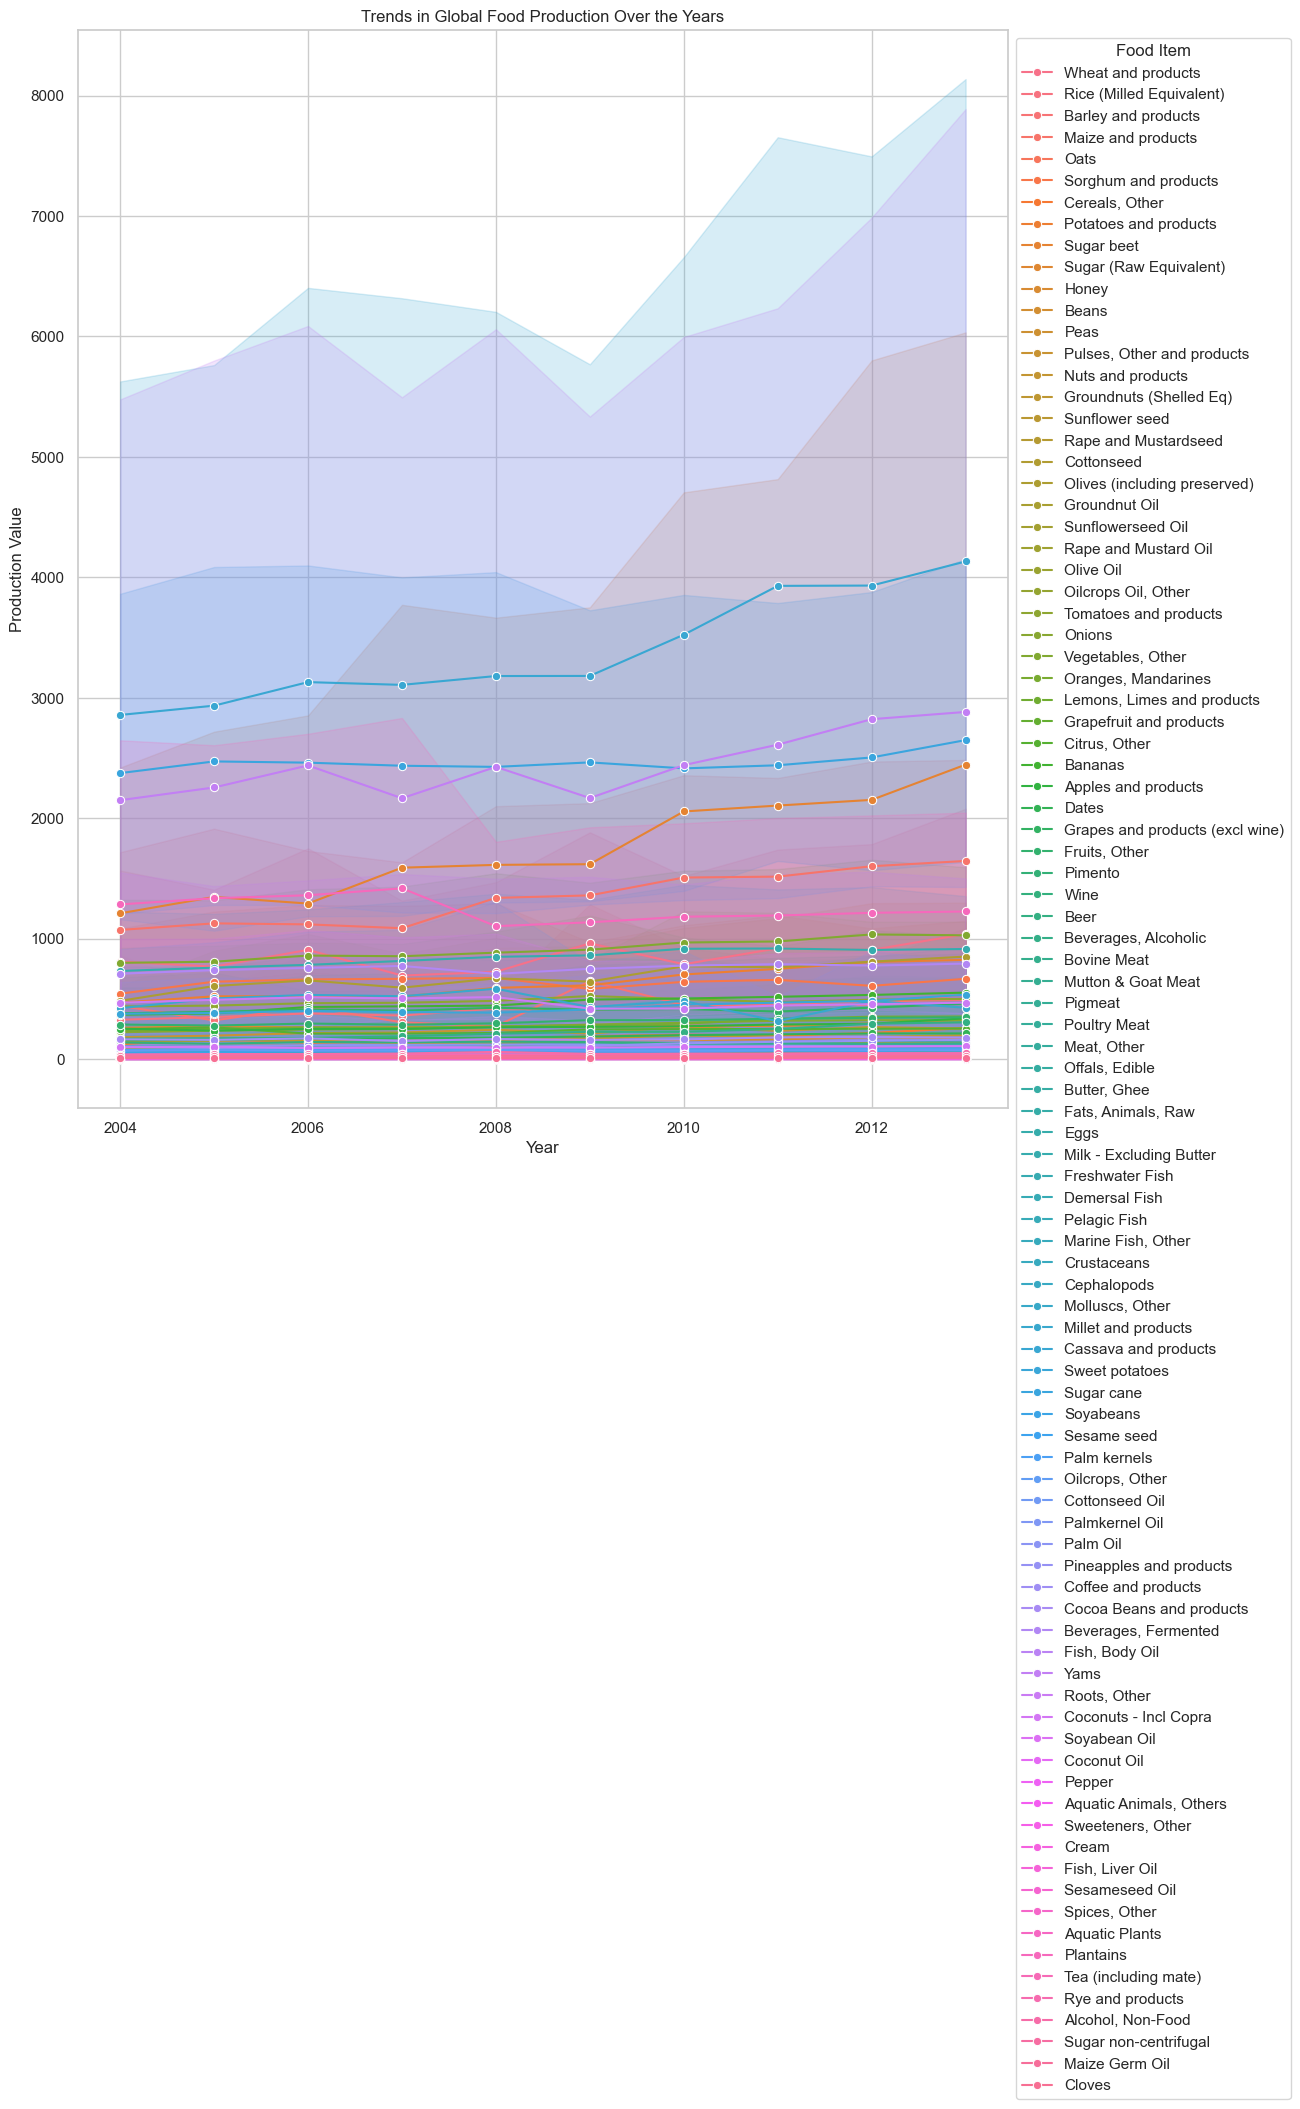

In [16]:
# Trends in Food Production and Consumption Over the Years
plt.figure(figsize=(12, 14))
sns.lineplot(x='Year', y='Value', hue='Item', data=df_prod, marker='o')
plt.title('Trends in Global Food Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production Value')
plt.legend(title='Food Item', bbox_to_anchor=(1, 1))
plt.show()

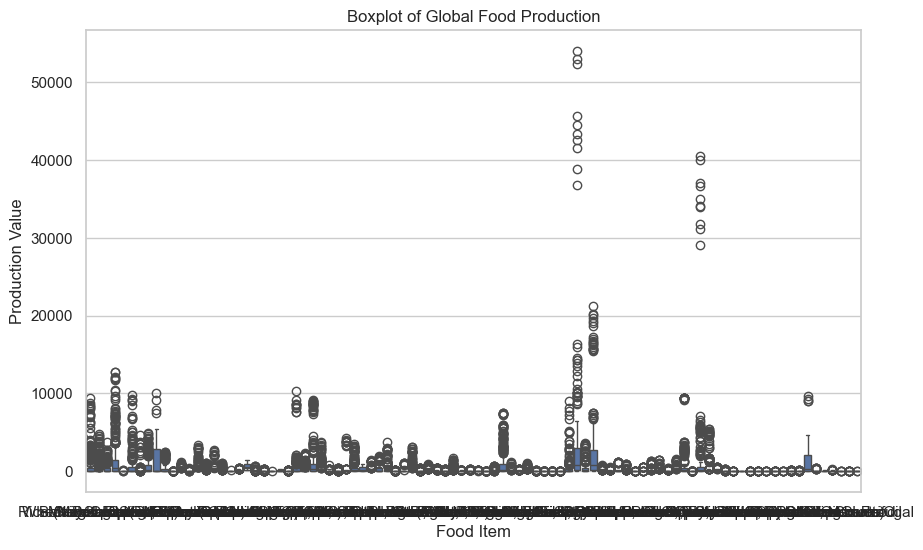

In [17]:
# Average and Median Food Production, Outliers, Quartile, and Interquartile Ranges
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item', y='Value', data=df_prod)
plt.title('Boxplot of Global Food Production')
plt.xlabel('Food Item')
plt.ylabel('Production Value')
plt.show()

In [18]:
# Comparison Between Average Food Consumption and Production for Each Year
# Merge the two datasets on 'Country' and 'Year'
merged_df = pd.merge(df_prod, df_supp, on=['Country', 'Year'], suffixes=('_prod', '_supp'))

In [19]:
# Calculate average production and consumption for each year
avg_production_consumption = merged_df.groupby('Year')[['Value_prod', 'Value_supp']].mean().reset_index()

<BarContainer object of 10 artists>

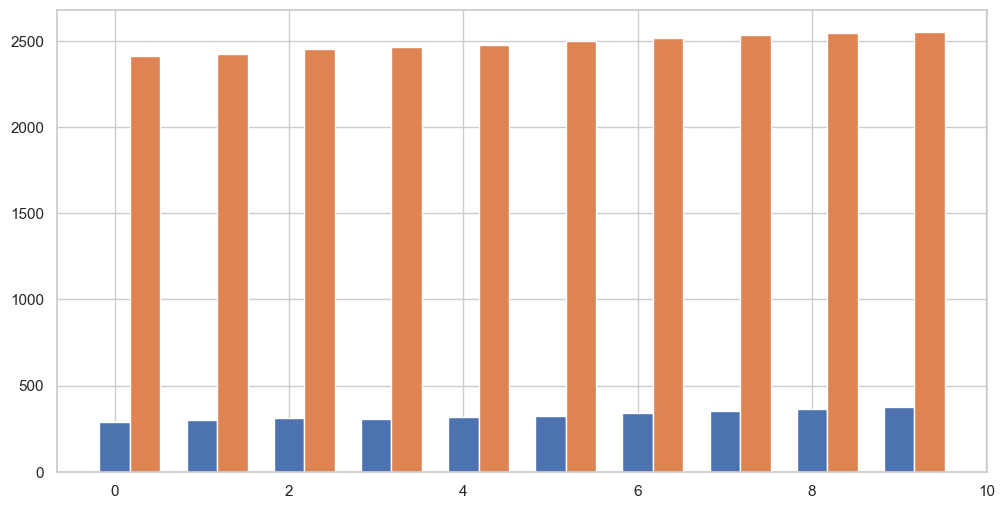

In [20]:
# Bar chart for comparison
plt.figure(figsize=(12, 6))
bar_width = 0.35
bar_positions = range(len(avg_production_consumption))

plt.bar(bar_positions, avg_production_consumption['Value_prod'], width=bar_width, label='Production')
plt.bar([pos + bar_width for pos in bar_positions], avg_production_consumption['Value_supp'], width=bar_width, label='Consumption')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


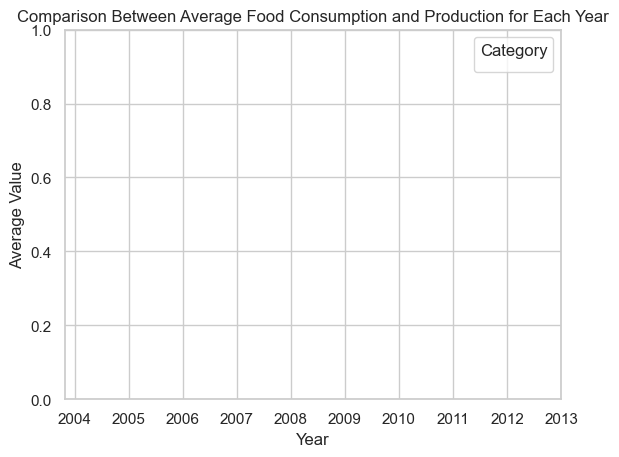

In [21]:
plt.title('Comparison Between Average Food Consumption and Production for Each Year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], avg_production_consumption['Year'])
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.show()

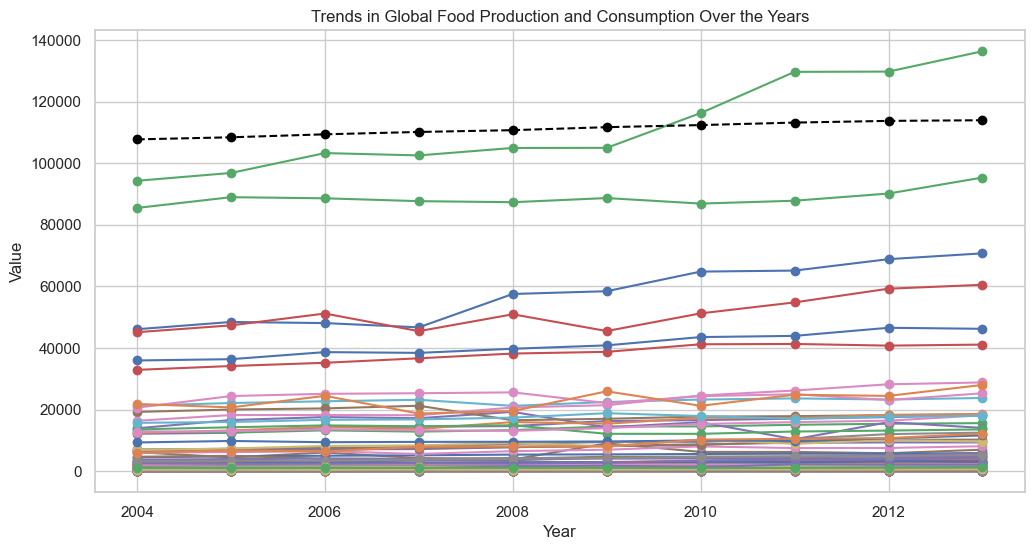

In [23]:

# Group data by year and item to get the sum of production and consumption for each year
prod_by_year = df_prod.groupby(['Year', 'Item'])['Value'].sum().reset_index()
supp_by_year = df_supp.groupby(['Year'])['Value'].sum().reset_index()

# Pivot the data for easier plotting
prod_pivot = prod_by_year.pivot(index='Year', columns='Item', values='Value')
supp_pivot = supp_by_year.set_index('Year')

# Plotting the trends in food production and consumption over the years
plt.figure(figsize=(12, 6))

# Plotting production trends
for column in prod_pivot.columns:
    plt.plot(prod_pivot.index, prod_pivot[column], marker='o', label=column)

# Plotting consumption trends
plt.plot(supp_pivot.index, supp_pivot['Value'], marker='o', label='Total Consumption', linestyle='--', color='black')

plt.title('Trends in Global Food Production and Consumption Over the Years')
plt.xlabel('Year')
plt.ylabel('Value')
#plt.legend()
plt.grid(True)
plt.show()

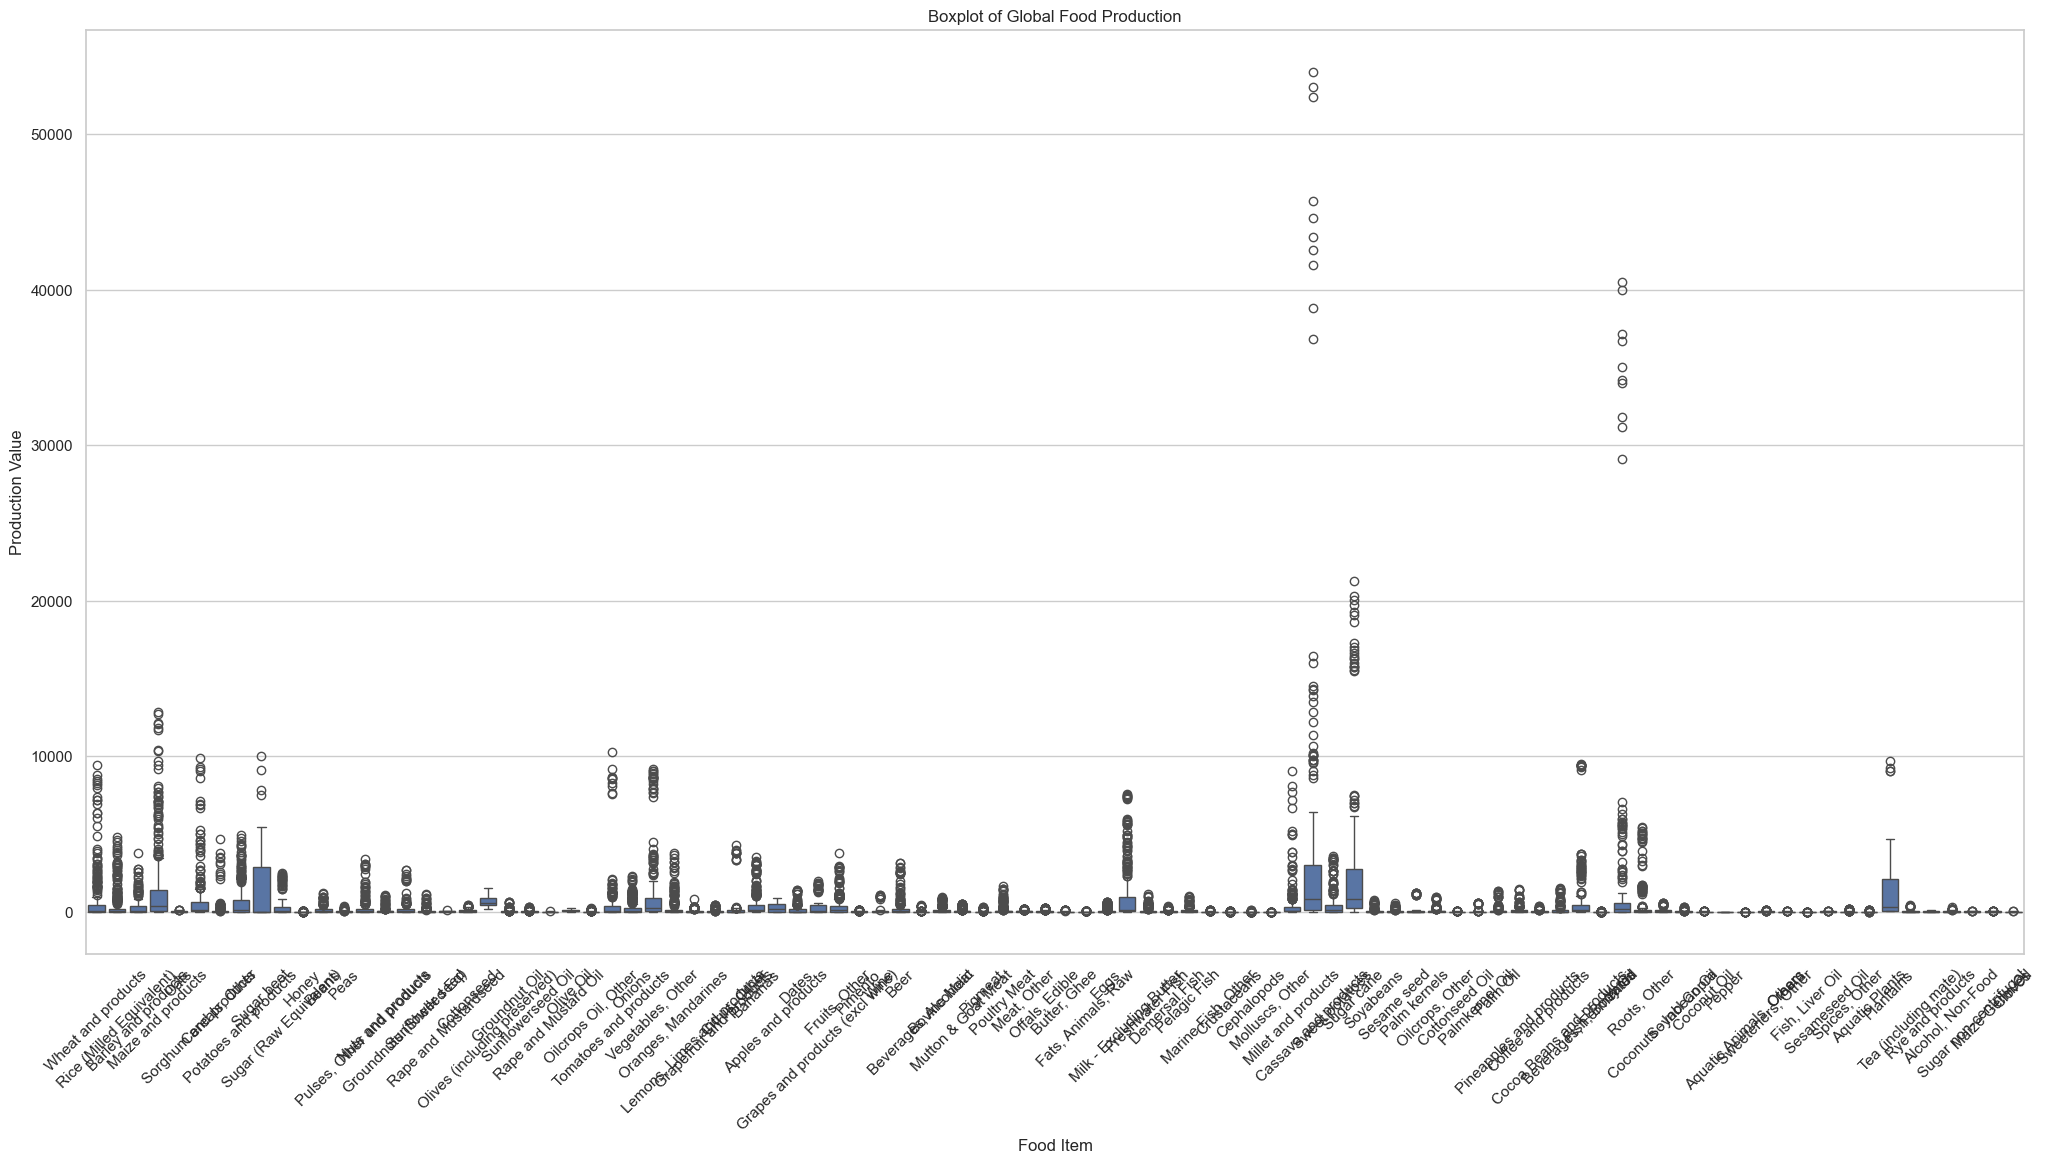

In [27]:
# Create a Boxplot for food production
plt.figure(figsize=(25, 12))
sns.boxplot(x='Item', y='Value', data=df_prod)
plt.title('Boxplot of Global Food Production')
plt.xlabel('Food Item')
plt.ylabel('Production Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

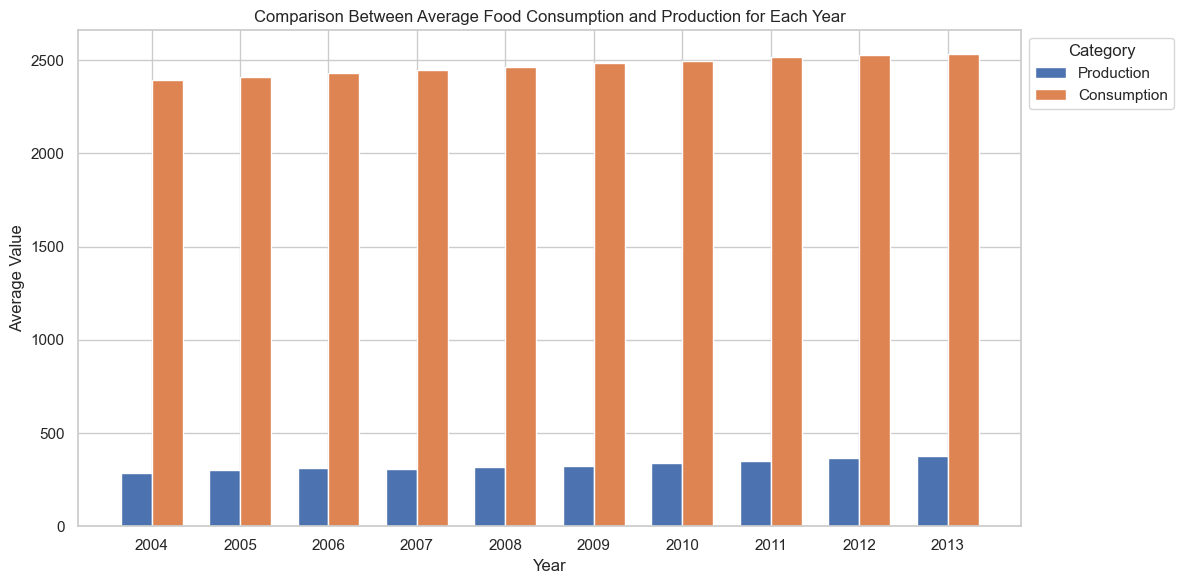

In [28]:
# Merge the two datasets on 'Year' to combine production and consumption data for each year
merged_df = pd.merge(df_prod, df_supp, on='Year', suffixes=('_prod', '_supp'))

# Calculate average production and consumption for each year
avg_production_consumption = merged_df.groupby('Year')[['Value_prod', 'Value_supp']].mean().reset_index()

# Create a grouped bar chart for comparison
plt.figure(figsize=(12, 6))
bar_width = 0.35
bar_positions = range(len(avg_production_consumption))

plt.bar(bar_positions, avg_production_consumption['Value_prod'], width=bar_width, label='Production')
plt.bar([pos + bar_width for pos in bar_positions], avg_production_consumption['Value_supp'], width=bar_width, label='Consumption')

plt.title('Comparison Between Average Food Consumption and Production for Each Year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], avg_production_consumption['Year'])
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [30]:
df_supp.columns, df_prod.columns

(Index(['Country', 'Year', 'Value'], dtype='object'),
 Index(['Country', 'Item', 'Year', 'Value'], dtype='object'))

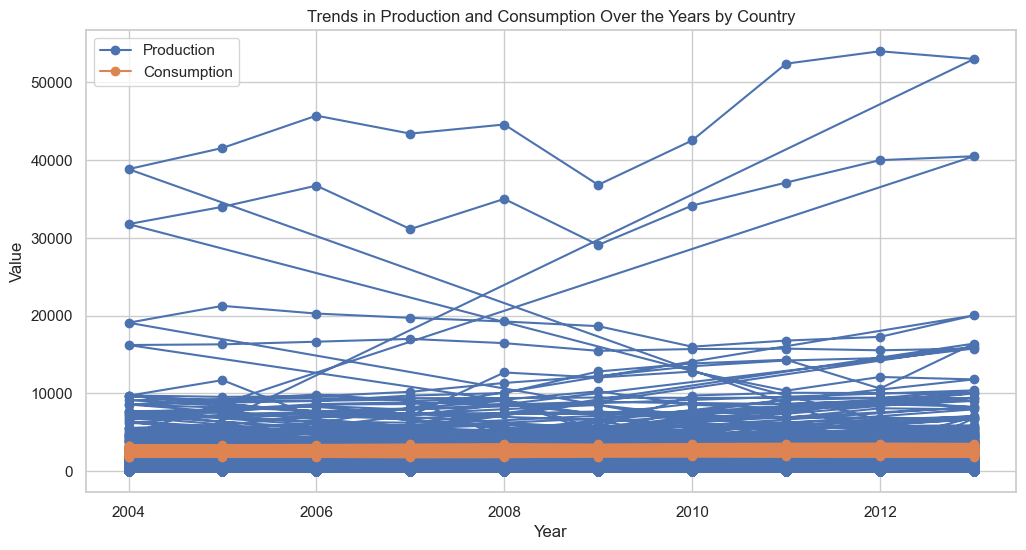

In [31]:
# Merge the datasets on 'Country' and 'Year'
merged_df = pd.merge(df_prod, df_supp, on=['Country', 'Year'], suffixes=('_prod', '_supp'))

# Group data by 'Country' for production and consumption
grouped_prod = merged_df.groupby('Country')['Value_prod'].sum()
grouped_supp = merged_df.groupby('Country')['Value_supp'].sum()

# Plot line charts for trends in 'Value' over the years for each 'Country'
plt.figure(figsize=(12, 6))

plt.plot(df_prod['Year'], df_prod['Value'], label='Production', marker='o', linestyle='-')
plt.plot(df_supp['Year'], df_supp['Value'], label='Consumption', marker='o', linestyle='-')

plt.title('Trends in Production and Consumption Over the Years by Country')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

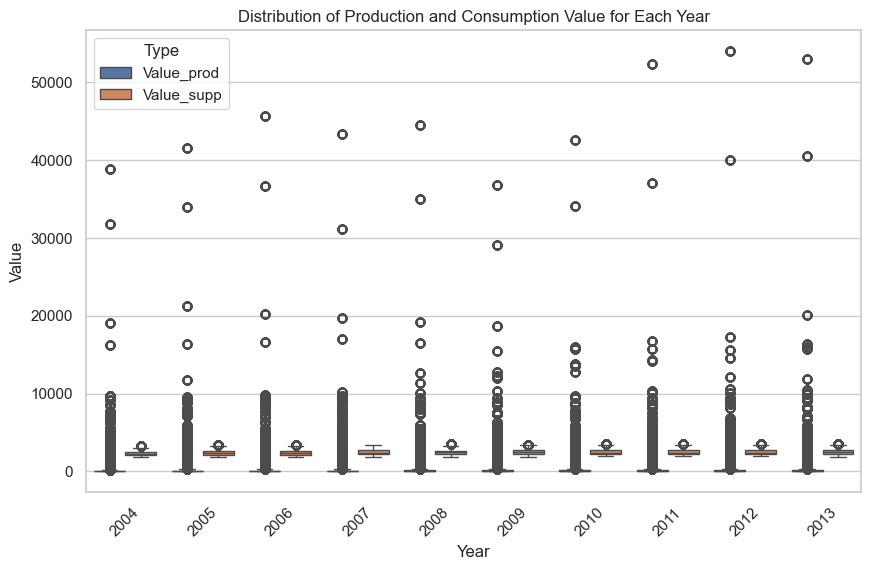

In [33]:
# Merge the datasets on 'Year' to combine production and consumption data
merged_df = pd.merge(df_prod, df_supp, on='Year', suffixes=('_prod', '_supp'))

# Create a new DataFrame with 'Year' and 'Value' columns for both production and consumption
year_value_df = merged_df[['Year', 'Value_prod', 'Value_supp']].melt(id_vars='Year', var_name='Type', value_name='Value')

# Create a Boxplot illustrating the distribution of 'Value' for each 'Year'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Value', hue='Type', data=year_value_df)
plt.title('Distribution of Production and Consumption Value for Each Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Type')
plt.show()

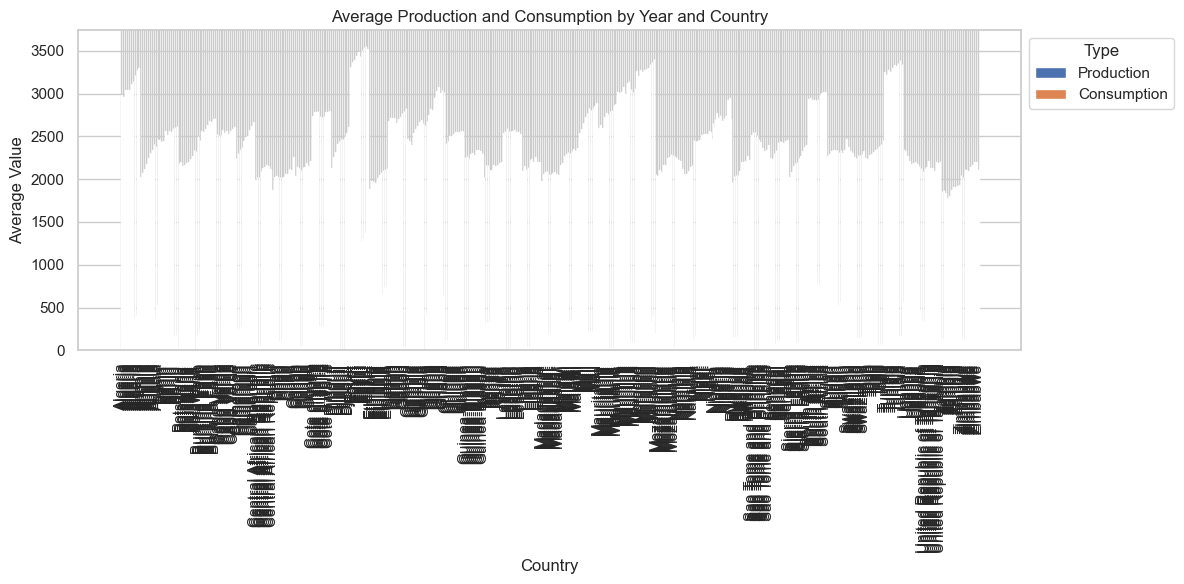

In [34]:
# Merge the datasets on 'Country' and 'Year'
merged_df = pd.merge(df_prod, df_supp, on=['Country', 'Year'], suffixes=('_prod', '_supp'))

# Group data by 'Country' and 'Year' for production and consumption
grouped_prod = merged_df.groupby(['Country', 'Year'])['Value_prod'].mean().reset_index()
grouped_supp = merged_df.groupby(['Country', 'Year'])['Value_supp'].mean().reset_index()

# Create a grouped bar chart comparing average 'Value' for each 'Year' by 'Country'
plt.figure(figsize=(12, 6))

bar_width = 0.35
bar_positions = range(len(grouped_prod))

plt.bar(bar_positions, grouped_prod['Value_prod'], width=bar_width, label='Production')
plt.bar([pos + bar_width for pos in bar_positions], grouped_supp['Value_supp'], width=bar_width, label='Consumption')

plt.title('Average Production and Consumption by Year and Country')
plt.xlabel('Country')
plt.ylabel('Average Value')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], grouped_prod['Country'], rotation=90)
plt.legend(title='Type', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()